<a href="https://colab.research.google.com/github/dhrumil84/stock-buybacks/blob/master/Alpha_Vantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import requests
import pandas as pd

from datetime import date
from datetime import datetime, timedelta 

import matplotlib.pyplot as plt

from google.colab import data_table
#from vega_datasets import data

data_table.enable_dataframe_formatter()

#data.airports()

In [77]:
import sqlite3
from sqlite3 import Error

In [53]:
base_url = 'https://www.alphavantage.co/query?function='

key = 'NBRKFN54KGSR3U0J'
overview = 'OVERVIEW'
tsd = 'TIME_SERIES_DAILY_ADJUSTED'
income = 'INCOME_STATEMENT'
balance = 'BALANCE_SHEET'
cf = 'CASH_FLOW'
earnings = 'EARNINGS'
earnings_cal = 'EARNINGS_CALENDAR'
horizon = '12month'


tckr = 'LRCX'

In [54]:
# Making a GET request
overview_r = requests.get(base_url + overview + '&symbol=' + tckr + '&apikey=' + key)
tsd_r = requests.get(base_url + tsd + '&symbol=' + tckr + '&outputsize=full&apikey=' + key)
income_r = requests.get(base_url + income + '&symbol=' + tckr + '&apikey=' + key)
balance_r = requests.get(base_url + balance + '&symbol=' + tckr + '&apikey=' + key)
cf_r = requests.get(base_url + cf + '&symbol=' + tckr + '&apikey=' + key)
earnings_r = requests.get(base_url + earnings + '&symbol=' + tckr + '&apikey=' + key)
earnings_cal_r = requests.get(base_url + income + '&symbol=' + tckr + '&horizon=' + horizon + '&apikey=' + key)

  
# check status code for response received
# success code - 200
print(overview_r)
print(tsd_r)
print(income_r)
print(balance_r)
print(cf_r)
print(earnings_r)
print(earnings_cal_r)
  
# print content of request
#print(r.content)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


###Company Overview

In [55]:
comp_info = pd.DataFrame(overview_r.json(), index=[1])

#len(r2.json())

comp_info.info()

#comp_info.head()
#comp_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Symbol                      1 non-null      object
 1   AssetType                   1 non-null      object
 2   Name                        1 non-null      object
 3   Description                 1 non-null      object
 4   CIK                         1 non-null      object
 5   Exchange                    1 non-null      object
 6   Currency                    1 non-null      object
 7   Country                     1 non-null      object
 8   Sector                      1 non-null      object
 9   Industry                    1 non-null      object
 10  Address                     1 non-null      object
 11  FiscalYearEnd               1 non-null      object
 12  LatestQuarter               1 non-null      object
 13  MarketCapitalization        1 non-null      object
 14

###Time Series Data

In [10]:
#today = date.today()
#tm = datetime.min.time()

#dttm = datetime.combine(today, tm)
#print(type(today))

dttm_now = datetime.now()

hist_dt = dttm_now - timedelta(days=3653)

print('10 years ago dt:', str(hist_dt))

10 years ago dt: 2013-01-28 19:05:35.746154


In [56]:
df = pd.DataFrame(tsd_r.json())

df.drop(columns=['Meta Data'], inplace=True)

df = df.iloc[5:]

df = df.set_index(pd.to_datetime(df.index))

df = df[(df.index >= hist_dt) & (df.index <= dttm)]

#df.tail(20)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2023-01-27 to 2013-01-29
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Time Series (Daily)  2518 non-null   object
dtypes: object(1)
memory usage: 39.3+ KB


In [58]:
df_ = pd.concat([df.drop(['Time Series (Daily)'], axis=1), df['Time Series (Daily)'].apply(pd.Series)], axis=1)

df_.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. adjusted close': 'adj_close', '6. volume': 'volume', '7. dividend amount': 'div_amt', '8. split coefficient': 'split_coef'}, inplace=True)

df_.head()

,open,high,low,close,adj_close,volume,div_amt,split_coef
2023-01-27,487.99,497.93,482.57,482.88,482.88,1711583,0.0000,1.0
2023-01-26,484.75,498.66,474.0014,497.75,497.75,2465780,0.0000,1.0
2023-01-25,472.19,491.39,467.0,488.4,488.4,1769701,0.0000,1.0
2023-01-24,485.21,491.7199,483.87,487.5,487.5,972308,0.0000,1.0
2023-01-23,474.8,498.84,472.39,490.78,490.78,1654504,0.0000,1.0


In [59]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2023-01-27 to 2013-01-29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   open        2518 non-null   object
 1   high        2518 non-null   object
 2   low         2518 non-null   object
 3   close       2518 non-null   object
 4   adj_close   2518 non-null   object
 5   volume      2518 non-null   object
 6   div_amt     2518 non-null   object
 7   split_coef  2518 non-null   object
dtypes: object(8)
memory usage: 177.0+ KB


In [60]:
#df_['4. close'] = df_['4. close'].astype('float')

cols_type = {'open': float, 'high': float, 'low': float, 'close': float, 'adj_close': float, 'volume': int, 'div_amt': float, 'split_coef': float}
   
df_ = df_.astype(cols_type)

df_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2023-01-27 to 2013-01-29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        2518 non-null   float64
 1   high        2518 non-null   float64
 2   low         2518 non-null   float64
 3   close       2518 non-null   float64
 4   adj_close   2518 non-null   float64
 5   volume      2518 non-null   int64  
 6   div_amt     2518 non-null   float64
 7   split_coef  2518 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 177.0 KB


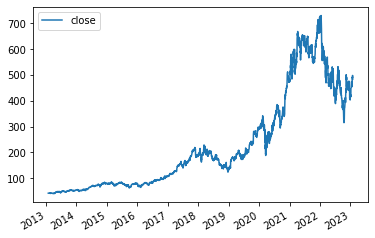

In [61]:
df_.plot.line(y='close')

In [62]:
df_['div_amt'].sum()

30.07

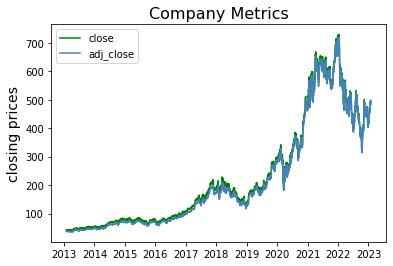

In [63]:
#plot individual lines with custom colors, styles, and widths
plt.plot(df_['close'], label='close', color='green')
plt.plot(df_['adj_close'], label='adj_close', color='steelblue')

#add legend
plt.legend()

#add axis labels and a title
plt.ylabel('closing prices', fontsize=14)
#plt.xlabel('Period', fontsize=14)
plt.title('Company Metrics', fontsize=16)

#display plot
plt.show()

Annualized Total Return = ((absolute value of capital gain + dividends) + 1)^(1 / years) - 1


###Financial Reporting - Income Statement, Balance Sheet & Cash Flow Statement

In [71]:
annual_inc = pd.DataFrame(income_r.json()['annualReports'])
annual_inc

quarterly_inc = pd.DataFrame(income_r.json()['quarterlyReports'])

quarterly_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   fiscalDateEnding                   20 non-null     object
 1   reportedCurrency                   20 non-null     object
 2   grossProfit                        20 non-null     object
 3   totalRevenue                       20 non-null     object
 4   costOfRevenue                      20 non-null     object
 5   costofGoodsAndServicesSold         20 non-null     object
 6   operatingIncome                    20 non-null     object
 7   sellingGeneralAndAdministrative    20 non-null     object
 8   researchAndDevelopment             20 non-null     object
 9   operatingExpenses                  20 non-null     object
 10  investmentIncomeNet                20 non-null     object
 11  netInterestIncome                  20 non-null     object
 12  interestIn

In [73]:
annual_balance = pd.DataFrame(balance_r.json()['annualReports'])
quarterly_balance = pd.DataFrame(balance_r.json()['quarterlyReports'])

quarterly_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   fiscalDateEnding                        20 non-null     object
 1   reportedCurrency                        20 non-null     object
 2   totalAssets                             20 non-null     object
 3   totalCurrentAssets                      20 non-null     object
 4   cashAndCashEquivalentsAtCarryingValue   20 non-null     object
 5   cashAndShortTermInvestments             20 non-null     object
 6   inventory                               20 non-null     object
 7   currentNetReceivables                   20 non-null     object
 8   totalNonCurrentAssets                   20 non-null     object
 9   propertyPlantEquipment                  20 non-null     object
 10  accumulatedDepreciationAmortizationPPE  20 non-null     object
 11  intangib

In [75]:
annual_cf = pd.DataFrame(cf_r.json()['annualReports'])
quarterly_cf = pd.DataFrame(cf_r.json()['quarterlyReports'])

quarterly_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 29 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   fiscalDateEnding                                           20 non-null     object
 1   reportedCurrency                                           20 non-null     object
 2   operatingCashflow                                          20 non-null     object
 3   paymentsForOperatingActivities                             20 non-null     object
 4   proceedsFromOperatingActivities                            20 non-null     object
 5   changeInOperatingLiabilities                               20 non-null     object
 6   changeInOperatingAssets                                    20 non-null     object
 7   depreciationDepletionAndAmortization                       20 non-null     object
 8   capitalExpenditures   

### Earnings and Earnings Calendar